# The following Notebook explores various weight update algorithms for the AHL Hebbian algorithm

### In each plot <span style="color:green">green</span> corresponds to the most activated neuron, <span style="color:cyan">cyan</span> corresponds to the second most activated neuron and <span style="color:red">red</span> corresponds to the least activated neuron. The movement of each neuron is shown by making earlier states more <span style="color:#AAAAAA">transparent</span> and the most recent states more *visible*.

In [3]:
import numpy as np
sqrt = np.sqrt

In [4]:
from matplotlib import pyplot as plt
def plot_history(x,W_history):
    plt.xlim([-1.0,1.0])
    plt.ylim([-1.0,1.0])
    plt.plot([x[:,0]],[x[:,1]], 'o',markersize=3, color='k')
    
    colors = ['g','c','r','o','b']
    for k in range(W_history.shape[1]):
        for t in range(W_history.shape[0]):
            x,y = W_history[t,k]
            alpha =.1 + .8*float(t)/W_history.shape[0]
            plt.plot([0,x], [0,y], '-',color=colors[k],alpha=alpha)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(y=0, color='gray')
    plt.axvline(x=0, color='gray')
    plt.xlim([-1.05,1.05])
    plt.ylim([-1.05,1.05])
    plt.show()

def rotate(W,theta):
    theta = np.radians(-theta)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    return np.dot(W,R)


# Algorithm in paper

In [5]:
def AHL_update_v1(x,W, lr=.1,gamma=.9):
    W_history = []
    for i,x_i in enumerate(x):
        a = np.dot(W,x_i)
        w_max,w_min = W[np.argmax(a)],W[np.argmin(a)]
        for j,x_j in enumerate(x_i):
            if(x_j > 0):
                for k,w in enumerate(W):
                    if(w[j] >= gamma*w_max[j]): W[k,j] += lr*x_j
            elif(x_j < 0):
                for k,w in enumerate(W):
                    if(w[j] <= gamma*w_min[j]): W[k,j] += lr*x_j
        W = W/np.linalg.norm(W,axis=1,keepdims=True)
        W_history.append(W)
    return np.array(W_history)

In [6]:
#Random samples in each quadrant
x_1st = np.random.normal([1/sqrt(2),1/sqrt(2)],scale=.05,size=(10,2))
x_2nd,x_3rd,x_4th = rotate(x_1st,90),rotate(x_1st,180),rotate(x_1st,270)

#Weights slightly off from each other
W_1st = np.array([[1/sqrt(2),1/sqrt(2)],[2/sqrt(5),1/sqrt(5)],[-1/sqrt(5),2/sqrt(5)]])
W_2nd,W_3rd,W_4th = rotate(W_1st,90),rotate(W_1st,180), rotate(W_1st,270)

#Samples slightly moved to make learn
mov = np.array([[.5,0.0]])
x_1st_,x_2nd_,x_3rd_,x_4th_ = x_1st-mov,x_2nd+mov,x_3rd+mov,x_4th-mov

#### Behavior Depends on what quadrant the least activated neuron is in.

Synaptic Competition = 3


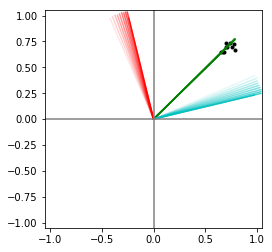

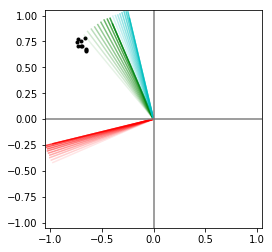

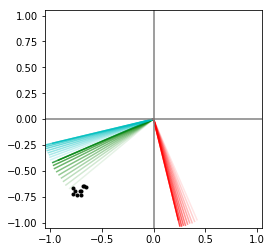

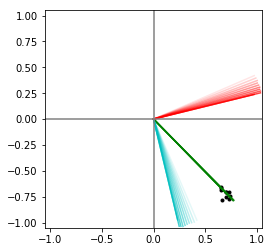

NO Synaptic Competition


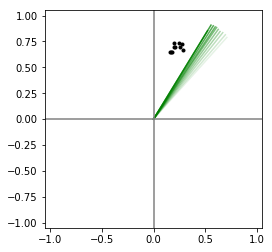

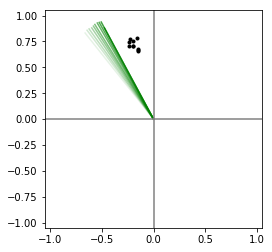

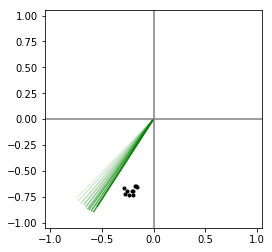

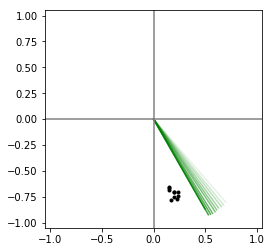

In [7]:
print("Synaptic Competition = 3")
for x,W in zip([x_1st,x_2nd,x_3rd,x_4th],[W_1st,W_2nd,W_3rd,W_4th]):
    plot_history(x,AHL_update_v1(x,W))

print("NO Synaptic Competition")
for x,W in zip([x_1st_,x_2nd_,x_3rd_,x_4th_],[W_1st[:1],W_2nd[:1],W_3rd[:1],W_4th[:1]]):
    plot_history(x,AHL_update_v1(x,W))
    

# Algorithm in MATLAB Code

In [8]:
def AHL_update_v2(x,W, lr=.1,gamma=.9):
    W_history = []
    for i,x_i in enumerate(x):
        a = np.dot(W,x_i)
        w_max,w_min = W[np.argmax(a)],W[np.argmin(a)]
        for k,w in enumerate(W):
            mask = w >= gamma*w_max
            x_masked = x_i*mask
            y = w*x_masked
            W[k] += lr*(x_masked - y*w)
        W = W/np.linalg.norm(W,axis=1,keepdims=True)
        W_history.append(W)
    return np.array(W_history)

#### Behavior Depends on quadrant of maximium activation weight. Plus there is an added term y*w.

Synaptic Competition = 3


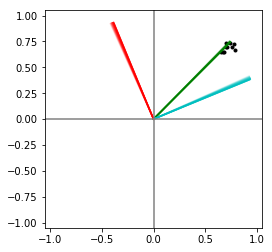

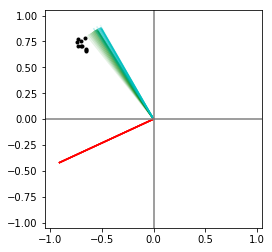

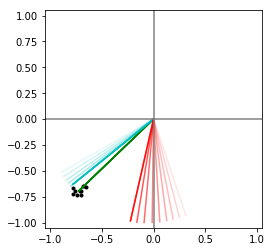

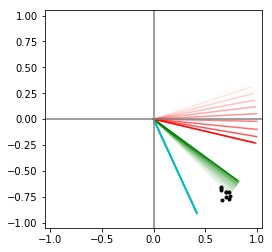

NO Synaptic Competition


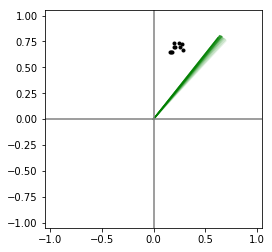

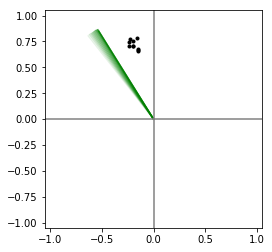

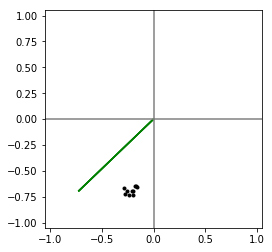

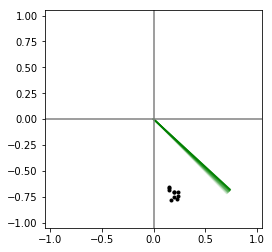

In [9]:
print("Synaptic Competition = 3")
for x,W in zip([x_1st,x_2nd,x_3rd,x_4th],[W_1st,W_2nd,W_3rd,W_4th]):
    plot_history(x,AHL_update_v2(x,W))

print("NO Synaptic Competition")
for x,W in zip([x_1st_,x_2nd_,x_3rd_,x_4th_],[W_1st[:1],W_2nd[:1],W_3rd[:1],W_4th[:1]]):
    plot_history(x,AHL_update_v2(x,W))
  

# Other option 1: Mask on absolute value

In [10]:
def AHL_update_o1(x,W, lr=.1,gamma=.9):
    W_history = []
    for i,x_i in enumerate(x):
        a = np.dot(W,x_i)
        w_max,w_min = W[np.argmax(a)],W[np.argmin(a)]
        for k,w in enumerate(W):
            mask = np.abs(w) >= np.abs(gamma*w_max)
            x_masked = x_i*mask
            W[k] += lr*(x_masked)
        W = W/np.linalg.norm(W,axis=1,keepdims=True)
        W_history.append(W)
    return np.array(W_history)

#### Behavior is independant of quadrant but least activated neuron approaches while second diverges. Probably depends on symmetry of the setup, and is not behavior in all cases.

Synaptic Competition = 3


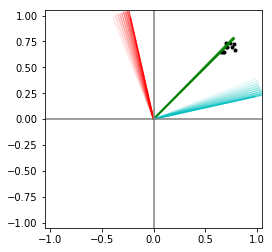

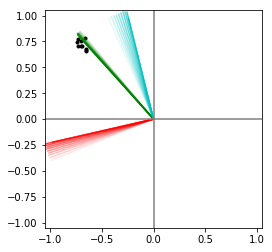

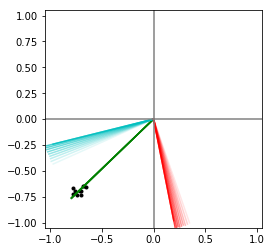

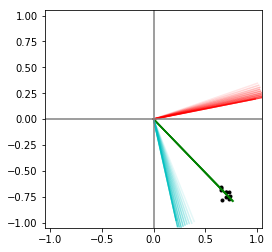

NO Synaptic Competition


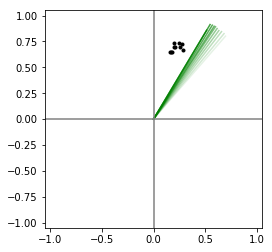

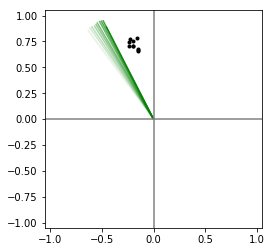

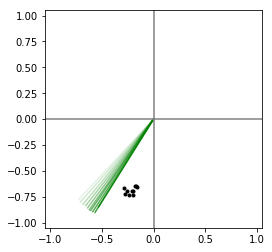

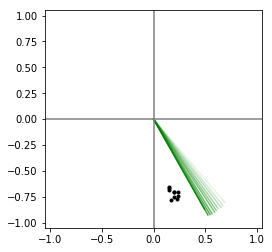

In [11]:
print("Synaptic Competition = 3")
for x,W in zip([x_1st,x_2nd,x_3rd,x_4th],[W_1st,W_2nd,W_3rd,W_4th]):
    plot_history(x,AHL_update_o1(x,W))

print("NO Synaptic Competition")
for x,W in zip([x_1st_,x_2nd_,x_3rd_,x_4th_],[W_1st[:1],W_2nd[:1],W_3rd[:1],W_4th[:1]]):
    plot_history(x,AHL_update_o1(x,W))
  

# Other option 2: don't mask

In [12]:
def AHL_update_o2(x,W, lr=.1,gamma=.9):
    W_history = []
    for i,x_i in enumerate(x):
        a = np.dot(W,x_i)
        w_max,w_min = W[np.argmax(a)],W[np.argmin(a)]
        for k,w in enumerate(W):
            W[k] += lr*(x_i)
        W = W/np.linalg.norm(W,axis=1,keepdims=True)
        W_history.append(W)
    return np.array(W_history)

#### Every neuron converges.

Synaptic Competition = 3


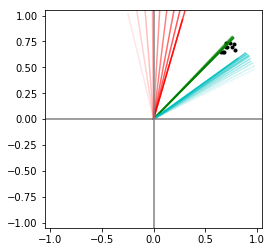

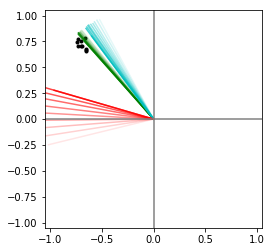

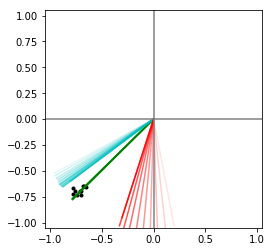

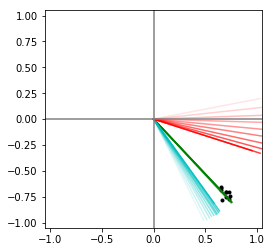

NO Synaptic Competition


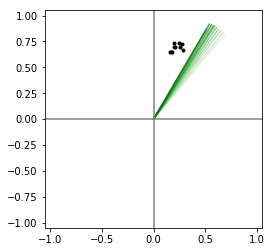

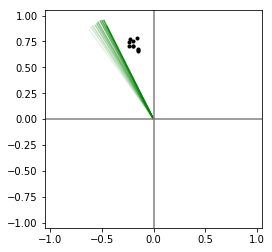

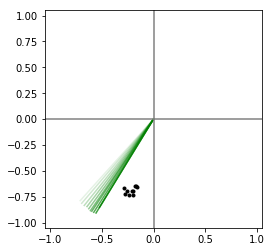

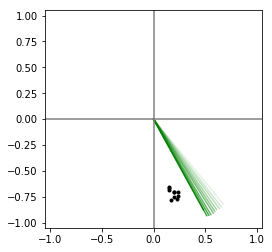

In [13]:
print("Synaptic Competition = 3")
for x,W in zip([x_1st,x_2nd,x_3rd,x_4th],[W_1st,W_2nd,W_3rd,W_4th]):
    plot_history(x,AHL_update_o2(x,W))

print("NO Synaptic Competition")
for x,W in zip([x_1st_,x_2nd_,x_3rd_,x_4th_],[W_1st[:1],W_2nd[:1],W_3rd[:1],W_4th[:1]]):
    plot_history(x,AHL_update_o2(x,W))
  

# Other option 3: Mask on activation, but not on individual weights.

In [14]:
def AHL_update_o3(x,W, lr=.1,gamma=.9):
    W_history = []
    for i,x_i in enumerate(x):
        a = np.dot(W,x_i)
        a_max = np.max(a)
        w_max,w_min = W[np.argmax(a)],W[np.argmin(a)]
        for k,w in enumerate(W):
            if(a[k] >= gamma*a_max):
                W[k] += lr*(x_i)
        W = W/np.linalg.norm(W,axis=1,keepdims=True)
        W_history.append(W)
    return np.array(W_history)

#### Only neurons with activation similar to main neuron converge.

Synaptic Competition = 3


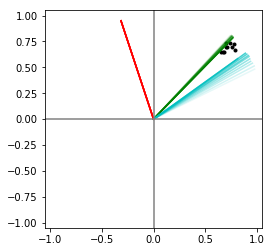

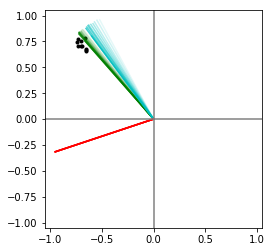

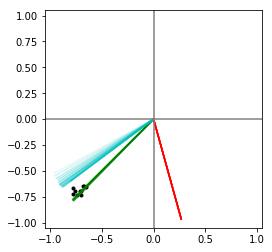

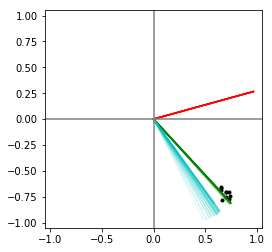

NO Synaptic Competition


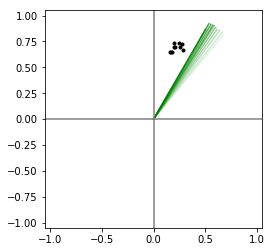

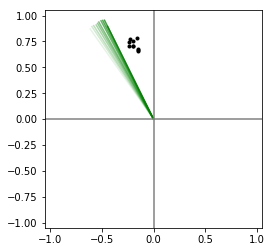

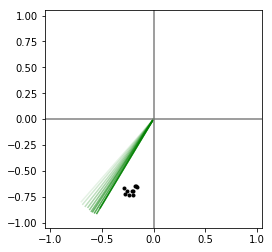

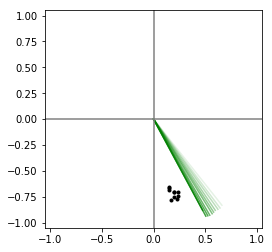

In [15]:
print("Synaptic Competition = 3")
for x,W in zip([x_1st,x_2nd,x_3rd,x_4th],[W_1st,W_2nd,W_3rd,W_4th]):
    plot_history(x,AHL_update_o3(x,W))

print("NO Synaptic Competition")
for x,W in zip([x_1st_,x_2nd_,x_3rd_,x_4th_],[W_1st[:1],W_2nd[:1],W_3rd[:1],W_4th[:1]]):
    plot_history(x,AHL_update_o3(x,W))
  